<a href="https://colab.research.google.com/github/zera-sol/Medal-Prediction/blob/main/Medal_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

teams = pd.read_csv("teams.csv")

teams

,team,country,year,events,athletes,age,height,weight,medals,prev_medals,prev_3_medals
0,AFG,Afghanistan,1964,8,8,22.0,161.0,64.2,0,0.0,0.0
1,AFG,Afghanistan,1968,5,5,23.2,170.2,70.0,0,0.0,0.0
2,AFG,Afghanistan,1972,8,8,29.0,168.3,63.8,0,0.0,0.0
3,AFG,Afghanistan,1980,11,11,23.6,168.4,63.2,0,0.0,0.0
4,AFG,Afghanistan,2004,5,5,18.6,170.8,64.8,0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
2139,ZIM,Zimbabwe,2000,19,26,25.0,179.0,71.1,0,0.0,0.0
2140,ZIM,Zimbabwe,2004,11,14,25.1,177.8,70.5,3,0.0,0.0
2141,ZIM,Zimbabwe,2008,15,16,26.1,171.9,63.7,4,3.0,1.0
2142,ZIM,Zimbabwe,2012,8,9,27.3,174.4,65.2,0,4.0,2.3


In [ ]:
teams = teams[["team", "country", "year", "athletes", "age", "height", "prev_medals", "medals"]]
teams

,team,country,year,athletes,age,height,prev_medals,medals
0,AFG,Afghanistan,1964,8,22.0,161.0,0.0,0
1,AFG,Afghanistan,1968,5,23.2,170.2,0.0,0
2,AFG,Afghanistan,1972,8,29.0,168.3,0.0,0
3,AFG,Afghanistan,1980,11,23.6,168.4,0.0,0
4,AFG,Afghanistan,2004,5,18.6,170.8,0.0,0
...,...,...,...,...,...,...,...,...
2139,ZIM,Zimbabwe,2000,26,25.0,179.0,0.0,0
2140,ZIM,Zimbabwe,2004,14,25.1,177.8,0.0,3
2141,ZIM,Zimbabwe,2008,16,26.1,171.9,3.0,4
2142,ZIM,Zimbabwe,2012,9,27.3,174.4,4.0,0


Here I am going to check the correlation between the feattures with "medals" column

In [ ]:
numerical_valueOf_teams = teams.select_dtypes(include=[float, int])

numerical_valueOf_teams.corr()["medals"]

,medals
year,-0.021603
athletes,0.840817
age,0.025096
height,0.141055
prev_medals,0.920048
medals,1.000000


There for from the above output we can assure that Athletes and prev_medals features are strongly contributing factor to get a precise prediction for unseen data since their correlation is maximum. Whereas the remaining features contribute low for the precise prediction.

## **Let's check correlation by using graph**

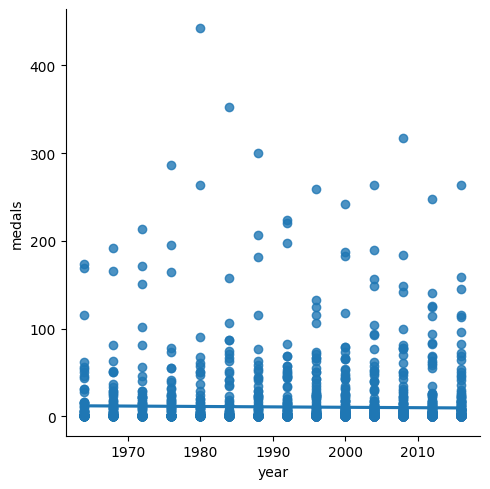

In [ ]:
import seaborn as sns

sns.lmplot(x="year", y="medals", data=teams, fit_reg=True, ci=None)

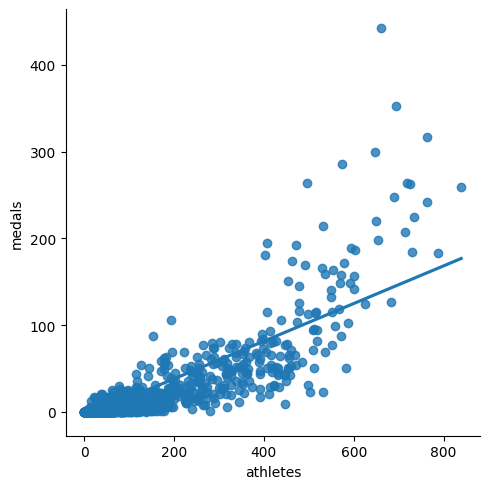

In [ ]:
sns.lmplot(x="athletes", y="medals", data=teams, fit_reg=True, ci=None)

**Now let me find if there is missing value in a given row**

---



In [ ]:
teams[teams.isnull().any(axis=1)]

,team,country,year,athletes,age,height,prev_medals,medals
19,ALB,Albania,1992,9,25.3,163.0,NaN,0
26,ALG,Algeria,1964,7,26.0,175.0,NaN,0
39,AND,Andorra,1976,3,28.3,174.7,NaN,0
50,ANG,Angola,1980,17,17.4,171.7,NaN,0
59,ANT,Antigua and Barbuda,1976,17,23.2,178.6,NaN,0
...,...,...,...,...,...,...,...,...
2092,VIN,Saint Vincent and the Grenadines,1988,6,20.5,157.0,NaN,0
2103,YAR,North Yemen,1984,3,27.7,163.3,NaN,0
2105,YEM,Yemen,1992,8,19.6,169.0,NaN,0
2112,YMD,South Yemen,1988,5,23.6,175.0,NaN,0


There are about 130 rows having empty cells so let clear a row having empty value since most Ml algorithms do not work with empty values


In [ ]:
teams = teams.dropna()
teams.shape

(2014, 8)

Now it is time to split the data in to **trianing **and **testing**

In [ ]:
train = teams[teams["year"] < 2012].copy()
train.shape

(1609, 8)

In [ ]:
test = teams[teams["year"] >= 2012].copy()
test.shape

(405, 8)

Now I've successfully splited the data into training and testing.

The next process will be processing the data using linear regreation algorithm

In [ ]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()

predictors = ["athletes", "prev_medals"]
target = "medals"

reg.fit(train[predictors], train["medals"])

LinearRegression()

In [ ]:
predictions = reg.predict(test[predictors])

test["predictions"] = predictions

test.loc[test["predictions"] < 0, "predictions"] = 0

test["predictions"] = test["predictions"].round()
test

,team,country,year,athletes,age,height,prev_medals,medals,predictions
6,AFG,Afghanistan,2012,6,24.8,171.7,1.0,1,0.0
7,AFG,Afghanistan,2016,3,24.7,173.7,1.0,0,0.0
24,ALB,Albania,2012,10,25.7,176.8,0.0,0,0.0
25,ALB,Albania,2016,6,23.7,176.2,0.0,0,0.0
37,ALG,Algeria,2012,39,24.8,174.3,2.0,1,2.0
...,...,...,...,...,...,...,...,...,...
2111,YEM,Yemen,2016,3,19.3,169.7,0.0,0,0.0
2131,ZAM,Zambia,2012,7,22.6,176.2,0.0,0,0.0
2132,ZAM,Zambia,2016,7,24.1,175.2,0.0,0,0.0
2142,ZIM,Zimbabwe,2012,9,27.3,174.4,4.0,0,2.0


In machine learning, **Mean Absolute Error (MAE)** is a common metric for evaluating the accuracy of a regression model. It represents **the average absolute difference between the predicted values and the actual values,** providing a direct measure of how far off the predictions are from the true values.

Let me compute** MAE**

In [80]:
from sklearn.metrics import mean_absolute_error

error = mean_absolute_error(test["medals"], test["predictions"])

error

3.2987654320987656

**Why Compare MAE with Standard Deviation?**

The standard deviation measures the spread or variability of the actual values in the target column, while the MAE tells us the average prediction error. **If your MAE is significantly lower than the standard deviation, it suggests that your model is effectively reducing the natural variability in the target data, meaning it's performing better than a simple average prediction.**

**If MAE << (much lower than) standard deviation:**

This suggests that the model is capturing a lot of the underlying pattern in the data. The predictions are generally close to the actual values compared to the spread in the target variable, indicating a good model.
MAE close to or higher than standard deviation:

**If the MAE >= standard deviation**

It this suggests that the model’s errors are almost as large as the natural variability of the target. This might indicate that the model is not capturing patterns well, potentially making predictions that are no better than a simple baseline.

Let me compute for standard devation

In [81]:
teams.describe()['medals']

,medals
count,2014.000000
mean,10.990070
std,33.627528
min,0.000000
25%,0.000000
50%,0.000000
75%,5.000000
max,442.000000


The standard devation of the "medals" column is 33.63 and the MAE is 3.3. From the text above we can conclude that predcted values close to exact value.

In [82]:
test[test["team"] == "ETH"]

,team,country,year,athletes,age,height,prev_medals,medals,predictions
639,ETH,Ethiopia,2012,34,23.8,170.8,7.0,7,6.0
640,ETH,Ethiopia,2016,38,23.4,170.0,7.0,8,6.0


In [83]:
test[test["team"] == "KEN"]

,team,country,year,athletes,age,height,prev_medals,medals,predictions
1066,KEN,Kenya,2012,51,24.6,169.4,15.0,11,13.0
1067,KEN,Kenya,2016,80,26.6,170.6,11.0,13,12.0


In [85]:
test[test["team"] == "CHN"]

,team,country,year,athletes,age,height,prev_medals,medals,predictions
404,CHN,China,2012,479,24.0,175.4,184.0,125,170.0
405,CHN,China,2016,499,24.0,175.0,125.0,113,127.0


In [86]:
test[test["team"] == "USA"]

,team,country,year,athletes,age,height,prev_medals,medals,predictions
2053,USA,United States,2012,689,26.7,178.3,317.0,248,285.0
2054,USA,United States,2016,719,26.4,178.0,248.0,264,236.0


In [96]:
error = (test['medals'] - test["predictions"]).abs()

error_by_team = error.groupby(test["team"]).mean()
medals_by_team = test["medals"].groupby(test["team"]).mean()
error_ratio =  error_by_team / medals_by_team

<Axes: ylabel='Frequency'>

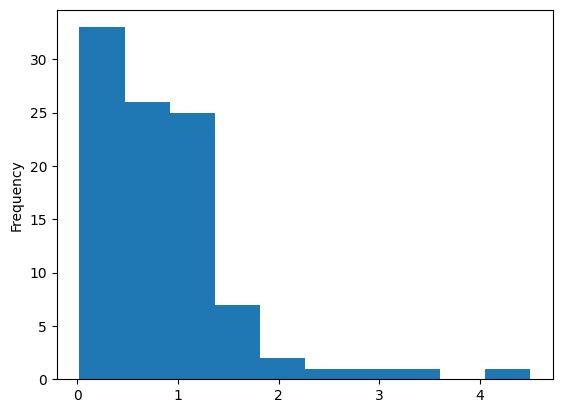

In [99]:
import numpy as np
error_ratio = error_ratio[np.isfinite(error_ratio)]
error_ratio.plot.hist()

In [100]:
error_ratio.sort_values()

,0
team,
FRA,0.022472
CAN,0.048387
NZL,0.063492
RUS,0.082353
ITA,0.121429
...,...
MAR,2.000000
EGY,2.400000
HKG,3.000000
